In [1]:
#Compare the Dallas Cowboys (since 2000) [Sacks, Safties, Ints] to NFC East Competitors [Eagles, Redskins, Giants}
#average [Sacks, Safties, Ints]? 
#Ttest, statistically different Sacks, Safties, Ints?
#Plot 

In [2]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from scipy.stats import linregress
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')


# File to Load (Remember to Change These)
file_to_load = "../Resources/Career_Stats_Defensive.csv"

# Read Purchasing File and store into Pandas data frame
defense_data = pd.read_csv(file_to_load)

In [3]:
defense_data.columns

Index(['Player Id', 'Name', 'Position', 'Year', 'Team', 'Games Played',
       'Total Tackles', 'Solo Tackles', 'Assisted Tackles', 'Sacks', 'Safties',
       'Passes Defended', 'Ints', 'Ints for TDs', 'Int Yards', 'Yards Per Int',
       'Longest Int Return'],
      dtype='object')

In [4]:
 
#clean data, pick the columns
defense_data_a = defense_data[['Name', 'Year', 'Team','Sacks', 'Safties', 'Ints']]
defense_stats = defense_data_a.loc[defense_data_a['Year'] >= 2000]


#the Dallas Cowboys 
defense_data_dal = defense_data.loc[defense_data_a['Team'] == 'Dallas Cowboys']
#covert dashes to zeros 
defense_dallas = defense_data_dal.replace(to_replace='--', value =0)
#drop any rows for missing information 
defense_dallas_stats = defense_dallas.dropna(how='any')
defense_dallas_stats



defense_dallas_stats["Sacks"] = defense_dallas_stats["Sacks"].astype(float)
defense_dallas_stats["Safties"] = defense_dallas_stats["Safties"].astype(float)
defense_dallas_stats["Ints"] = defense_dallas_stats["Ints"].astype(float)
## comeback todefense_dallas_stats["Sacks"] = defense_dallas_stats["Sacks"].astype(float)
defense_dallas_stats.dtypes
#to get rid of red box below
#new_file = defense_dallas_stats.copy()



Player Id              object
Name                   object
Position               object
Year                    int64
Team                   object
Games Played            int64
Total Tackles          object
Solo Tackles           object
Assisted Tackles       object
Sacks                 float64
Safties               float64
Passes Defended        object
Ints                  float64
Ints for TDs           object
Int Yards              object
Yards Per Int         float64
Longest Int Return     object
dtype: object

In [5]:
###
#defnes_stats is the dataframe we will start with gives us our columns the years we are looking at
#isolate the NFC East
defense_nfc = defense_stats.loc[(defense_stats['Team'] == 'Philadelphia Eagles') | (defense_stats['Team'] == 'New York Giants')| (defense_stats['Team'] == 'Washington Redskins') | (defense_stats['Team'] == 'Dallas Cowboys')]

#get rid of the dashes make them zeroes 

defense_nfc_stats = defense_nfc.replace(to_replace='--', value =0)

defense_nfc_stats["Sacks"] = defense_nfc_stats["Sacks"].astype(float)
defense_nfc_stats["Safties"] = defense_nfc_stats["Safties"].astype(float)
defense_nfc_stats["Ints"] = defense_nfc_stats["Ints"].astype(float)
#defense_nfc_stats["Team"] = defense_nfc_stats["Team"].astype(str)


#drop any rows for missing information 
defense_nfc_stats = defense_nfc_stats.dropna(how='any')

defense_nfc_stats.dtypes


Name        object
Year         int64
Team        object
Sacks      float64
Safties    float64
Ints       float64
dtype: object

In [6]:
#ttest sacks
#is there a statistical difference between the Dallas Cowboys and its NFC East Competitors 

cowboys = defense_nfc_stats.loc[defense_nfc_stats['Team'] == 'Dallas Cowboys'] 
eagles = defense_nfc_stats.loc[defense_nfc_stats['Team'] == 'Philadelphia Eagles'] 
giants = defense_nfc_stats.loc[defense_nfc_stats['Team'] == 'New York Giants'] 
redskins = defense_nfc_stats.loc[defense_nfc_stats['Team'] == 'Washington Redskins'] 


import scipy.stats as stats 

#comparing to see if the teams are statistically different across the avergae player sacks... 
#p value <0.05 on the pvalue means there is a statistical difference between the two teams 
comparison_redskins = stats.ttest_ind(cowboys['Sacks'], redskins['Sacks']).pvalue
comparison_eagles = stats.ttest_ind(cowboys['Sacks'], eagles['Sacks']).pvalue
comparison_giants = stats.ttest_ind(cowboys['Sacks'], giants['Sacks']).pvalue

sacks_ttest_df = pd.DataFrame({
    'P-Value Redskins v. Cowboys':[comparison_redskins],
    'P-Value Eagles v. Cowboys':[comparison_eagles],
    'P-Value Giants v. Cowboys':[comparison_giants]
})

# #have questions on how to present this data ttest ask BILL 

sacks_ttest_df

,P-Value Redskins v. Cowboys,P-Value Eagles v. Cowboys,P-Value Giants v. Cowboys
0,0.641784,0.544476,0.817269


In [7]:
#ttest safties

#comparing to see if the teams are statistically different across the avergae player sacks... 
#p value <0.05 on the pvalue means there is a statistical difference between the two teams 
comp_saf_redskins = stats.ttest_ind(cowboys['Safties'], redskins['Safties']).pvalue
comp_saf_eagles = stats.ttest_ind(cowboys['Safties'], eagles['Safties']).pvalue
comp_saf_giants = stats.ttest_ind(cowboys['Safties'], giants['Safties']).pvalue

safties_ttest_df = pd.DataFrame({
    'P-Value Redskins v. Cowboys':[comp_saf_redskins],
    'P-Value Eagles v. Cowboys':[comp_saf_eagles],
    'P-Value Giants v. Cowboys':[comp_saf_giants]
})

#sacks_ttest_df = sacks_ttest_df.set_index('Team')
# #have questions on how to present this data ttest ask BILL 

safties_ttest_df

,P-Value Redskins v. Cowboys,P-Value Eagles v. Cowboys,P-Value Giants v. Cowboys
0,0.419375,0.998235,0.389073


In [8]:
#ttest Ints

#comparing to see if the teams are statistically different across the avergae player sacks... 
#p value <0.05 on the pvalue means there is a statistical difference between the two teams 
comp_ints_redskins = stats.ttest_ind(cowboys['Ints'], redskins['Ints']).pvalue
comp_ints_eagles = stats.ttest_ind(cowboys['Ints'], eagles['Ints']).pvalue
comp_ints_giants = stats.ttest_ind(cowboys['Ints'], giants['Ints']).pvalue

ints_ttest_df = pd.DataFrame({
    'P-Value Redskins v. Cowboys':[comp_ints_redskins],
    'P-Value Eagles v. Cowboys':[comp_ints_eagles],
    'P-Value Giants v. Cowboys':[comp_ints_giants]
})

#sacks_ttest_df = sacks_ttest_df.set_index('Team')
# #have questions on how to present this data ttest ask BILL 

ints_ttest_df

,P-Value Redskins v. Cowboys,P-Value Eagles v. Cowboys,P-Value Giants v. Cowboys
0,0.724696,0.325863,0.431598


In [9]:
#averages 

avg_test = defense_nfc_stats.groupby('Team')

avg_sacks = avg_test['Sacks'].mean().map('{:.04f}'.format)
avg_safties= avg_test['Safties'].mean().map('{:.04f}'.format)
avg_ints = avg_test['Ints'].mean().map('{:.04f}'.format)

max_sacks = avg_test['Sacks'].max()
#do a min !!!!!!
# make more box plots !!! 
#presenting to a technical audience so you can have both slides and flip to your jupyter notebook 


#per player per season each row
# sum_safties= avg_test['Safties'].sum()
# sum_ints = avg_test['Ints'].sum()

stats_nfc_east= pd.DataFrame({
    'Avg. Sacks':avg_sacks,
    'Avg. Safties':avg_safties,
    'Avg. Ints':avg_ints,
    'Max Sacks':max_sacks,
#     'Sum Safties':sum_safties,
#     'Sum Ints':sum_ints,
})
stats_nfc_east.head()



,Avg. Sacks,Avg. Safties,Avg. Ints,Max Sacks
Team,,,,
Dallas Cowboys,0.8186,0.0054,0.2798,20.0
New York Giants,0.7871,0.0100,0.3213,16.5
Philadelphia Eagles,0.9000,0.0054,0.3333,18.0
Washington Redskins,0.7573,0.0097,0.2979,13.5


<AxesSubplot:title={'center':'Sacks'}, xlabel='Team'>

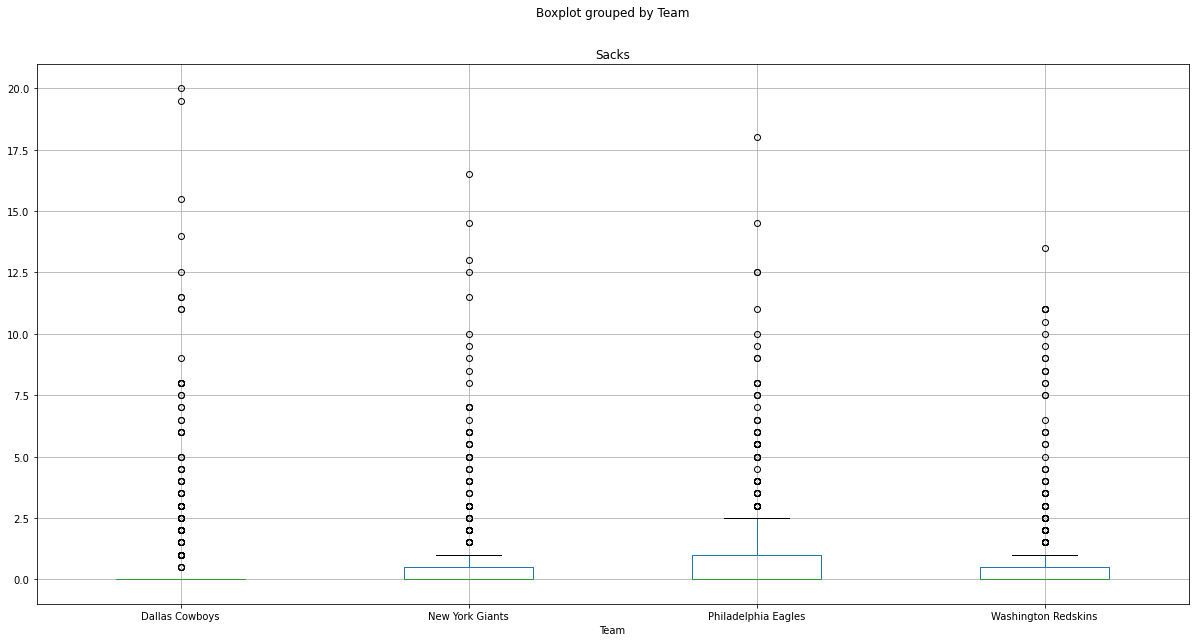

In [10]:
defense_nfc_stats.boxplot("Sacks", by="Team", figsize=(20, 10))
#defense_nfc_stats_final.head()

In [26]:
#tukey the eagles, redskins, giants 
#create eagles only df to compare to Dallas 
eagles_nfc = defense_stats.loc[(defense_stats['Team'] == 'Philadelphia Eagles')]

#get rid of the dashes make them zeroes 

eagles_nfc_stats = eagles_nfc.replace(to_replace='--', value =0)

eagles_nfc_stats["Sacks"] = defense_nfc_stats["Sacks"].astype(float)
eagles_nfc_stats["Safties"] = defense_nfc_stats["Safties"].astype(float)
eagles_nfc_stats["Ints"] = defense_nfc_stats["Ints"].astype(float)

#drop any rows for missing information 
eagles_nfc_stats = defense_nfc_stats.dropna(how='any')

eagles_nfc_stats.dtypes

Name        object
Year         int64
Team        object
Sacks      float64
Safties    float64
Ints       float64
dtype: object

In [27]:
#one way, sacks 
stats.f_oneway(defense_dallas_stats['Sacks'], eagles_nfc_stats['Sacks'])

F_onewayResult(statistic=8.372316899752521, pvalue=0.0038449662044102205)

In [13]:
#one way safties
stats.f_oneway(defense_dallas_stats['Safties'], eagles_nfc_stats['Safties'])

F_onewayResult(statistic=0.25605635843788166, pvalue=0.6128901125234607)

In [14]:
#oneway Ints
stats.f_oneway(defense_dallas_stats['Ints'], eagles_nfc_stats['Ints'])

F_onewayResult(statistic=5.284519307076588, pvalue=0.021603419137369635)

In [15]:
# # #paired comparisons Dallas Cowboys versus Redskins

# redskins_nfc = defense_stats.loc[(defense_stats['Team'] == 'Washington Redskins')]

# # #get rid of the dashes make them zeroes 

# redskins_nfc_stats = redskins_nfc.replace(to_replace='--', value =0)

# redskins_nfc_stats["Sacks"] = defense_nfc_stats["Sacks"].astype(float)
# redskins_nfc_stats["Safties"] = defense_nfc_stats["Safties"].astype(float)
# redskins_nfc_stats["Ints"] = defense_nfc_stats["Ints"].astype(float)

# # #drop any rows for missing information 
# redskins_nfc_stats = defense_nfc_stats.dropna(how='any')

# redskins_nfc_stats.dtypes

In [16]:
#one way, sacks 
#stats.f_oneway(eagles_nfc_stats['Sacks'], redskins_nfc_stats['Sacks'])

In [17]:
#one way safties
# stats.f_oneway(defense_dallas_stats['Safties'], redskins_nfc_stats['Safties'])

In [18]:
# one Ints
# stats.f_oneway(defense_dallas_stats['Ints'], redskins_nfc_stats['Ints'])

In [19]:

# giants_nfc = defense_stats.loc[(defense_stats['Team'] == 'New York Giants')]


# giants_nfc_stats = giants_nfc.replace(to_replace='--', value =0)

# giants_nfc_stats["Sacks"] = defense_nfc_stats["Sacks"].astype(float)
# giants_nfc_stats["Safties"] = defense_nfc_stats["Safties"].astype(float)
# giants_nfc_stats["Ints"] = defense_nfc_stats["Ints"].astype(float)

# giants_nfc_stats = defense_nfc_stats.dropna(how='any')

# giants_nfc_stats.dtypes

In [20]:
#stats.f_oneway(defense_dallas_stats['Sacks'], giants_nfc_stats['Sacks'])

In [21]:
#stats.f_oneway(defense_dallas_stats['Safties'], giants_nfc_stats['Safties'])

In [22]:
#stats.f_oneway(defense_dallas_stats['Ints'], giants_nfc_stats['Ints'])

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------
     Dallas Cowboys     New York Giants  -0.0314    0.9 -0.3694 0.3065  False
     Dallas Cowboys Philadelphia Eagles   0.0814    0.9 -0.2473 0.4101  False
     Dallas Cowboys Washington Redskins  -0.0613    0.9  -0.396 0.2733  False
    New York Giants Philadelphia Eagles   0.1129  0.803 -0.2249 0.4506  False
    New York Giants Washington Redskins  -0.0299    0.9 -0.3735 0.3137  False
Philadelphia Eagles Washington Redskins  -0.1427 0.6694 -0.4772 0.1917  False
-----------------------------------------------------------------------------


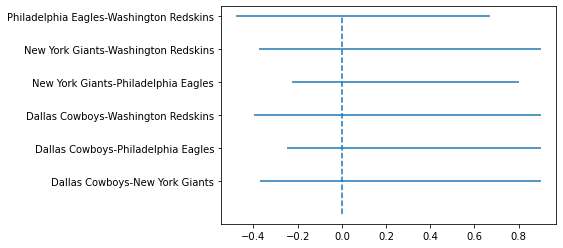

In [23]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt 

#paired comparisons Dallas Cowboys versus Eagles versus Redskins versus Giants 'Sacks'
#tukey = pairwise_tukeyhsd(endog=defense_nfc_stats_final['Safties'], groups= defense_nfc_stats_final['Team'], alpha=0.05)
tukey = pairwise_tukeyhsd(defense_nfc_stats['Sacks'], defense_nfc_stats['Team'], alpha=0.05)
print(tukey)
rows = tukey.summary().data[1:]

plt.hlines(range(len(rows)), [row[3] for row in rows], [row[4] for row in rows])
plt.vlines(0, -1, len(rows)-1, linestyles='dashed') 
plt.gca().set_yticks(range(len(rows)))
plt.gca().set_yticklabels([f'{x[0]}-{x[1]}' for x in rows])
plt.show()

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------
     Dallas Cowboys     New York Giants   0.0046 0.7993 -0.0091 0.0184  False
     Dallas Cowboys Philadelphia Eagles     -0.0    0.9 -0.0134 0.0133  False
     Dallas Cowboys Washington Redskins   0.0043 0.8336 -0.0093 0.0179  False
    New York Giants Philadelphia Eagles  -0.0046  0.798 -0.0184 0.0091  False
    New York Giants Washington Redskins  -0.0004    0.9 -0.0143 0.0136  False
Philadelphia Eagles Washington Redskins   0.0043 0.8324 -0.0093 0.0179  False
-----------------------------------------------------------------------------


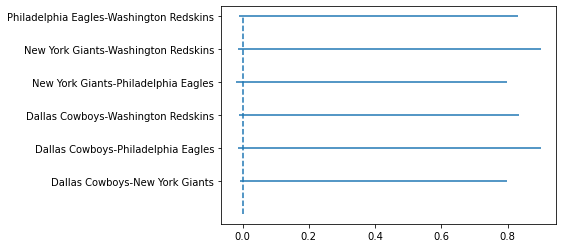

In [24]:

#paired comparisons Dallas Cowboys versus Eagles versus Redskins versus Giants 'Safties'
#tukey = pairwise_tukeyhsd(endog=defense_nfc_stats_final['Safties'], groups= defense_nfc_stats_final['Team'], alpha=0.05)
tukey = pairwise_tukeyhsd(defense_nfc_stats['Safties'], defense_nfc_stats['Team'], alpha=0.05)
print(tukey)
rows = tukey.summary().data[1:]

plt.hlines(range(len(rows)), [row[3] for row in rows], [row[4] for row in rows])
plt.vlines(0, -1, len(rows)-1, linestyles='dashed') 
plt.gca().set_yticks(range(len(rows)))
plt.gca().set_yticklabels([f'{x[0]}-{x[1]}' for x in rows])
plt.show()

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------
     Dallas Cowboys     New York Giants   0.0415 0.8619    -0.1  0.183  False
     Dallas Cowboys Philadelphia Eagles   0.0535 0.7236 -0.0841 0.1912  False
     Dallas Cowboys Washington Redskins   0.0181    0.9  -0.122 0.1582  False
    New York Giants Philadelphia Eagles    0.012    0.9 -0.1294 0.1535  False
    New York Giants Washington Redskins  -0.0234    0.9 -0.1673 0.1205  False
Philadelphia Eagles Washington Redskins  -0.0355    0.9 -0.1755 0.1046  False
-----------------------------------------------------------------------------


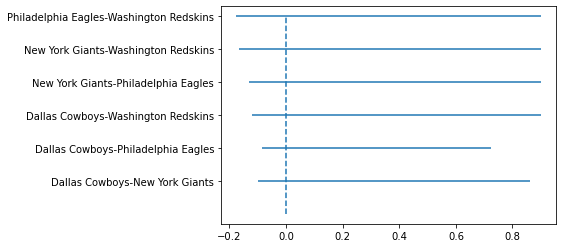

In [25]:

#paired comparisons Dallas Cowboys versus Eagles versus Redskins versus Giants 'Ints'
#tukey = pairwise_tukeyhsd(endog=defense_nfc_stats_final['Safties'], groups= defense_nfc_stats_final['Team'], alpha=0.05)
tukey = pairwise_tukeyhsd(defense_nfc_stats['Ints'], defense_nfc_stats['Team'], alpha=0.05)
print(tukey)
rows = tukey.summary().data[1:]

plt.hlines(range(len(rows)), [row[3] for row in rows], [row[4] for row in rows])
plt.vlines(0, -1, len(rows)-1, linestyles='dashed') 
plt.gca().set_yticks(range(len(rows)))
plt.gca().set_yticklabels([f'{x[0]}-{x[1]}' for x in rows])
plt.show()